```bash
The type in the "geometry" column depends on what we are trying to show: for instance, we might use:

a Point for the epicenter of an earthquake,
a LineString for a street, or
a Polygon to show country boundaries.

All three types of geometric objects have built-in attributes that you can use to quickly analyze the dataset. For instance, you can get the x- and y-coordinates of a Point from the x and y attributes, respectively.

# 导包

In [21]:
import geopandas as gpd
import fiona
from geodatasets import get_path
import matplotlib.pyplot as plt
%matplotlib inline

# 获取数据

In [2]:
loans_filepath = "archive/kiva_loans/kiva_loans/kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.0287)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.0287)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


# Plot

## 全球 Kiva 贷款

In [ ]:
# 全球陆地地图
world_filepath = get_path('naturalearth.land')
world = gpd.read_file(world_filepath)
world.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


<Axes: >

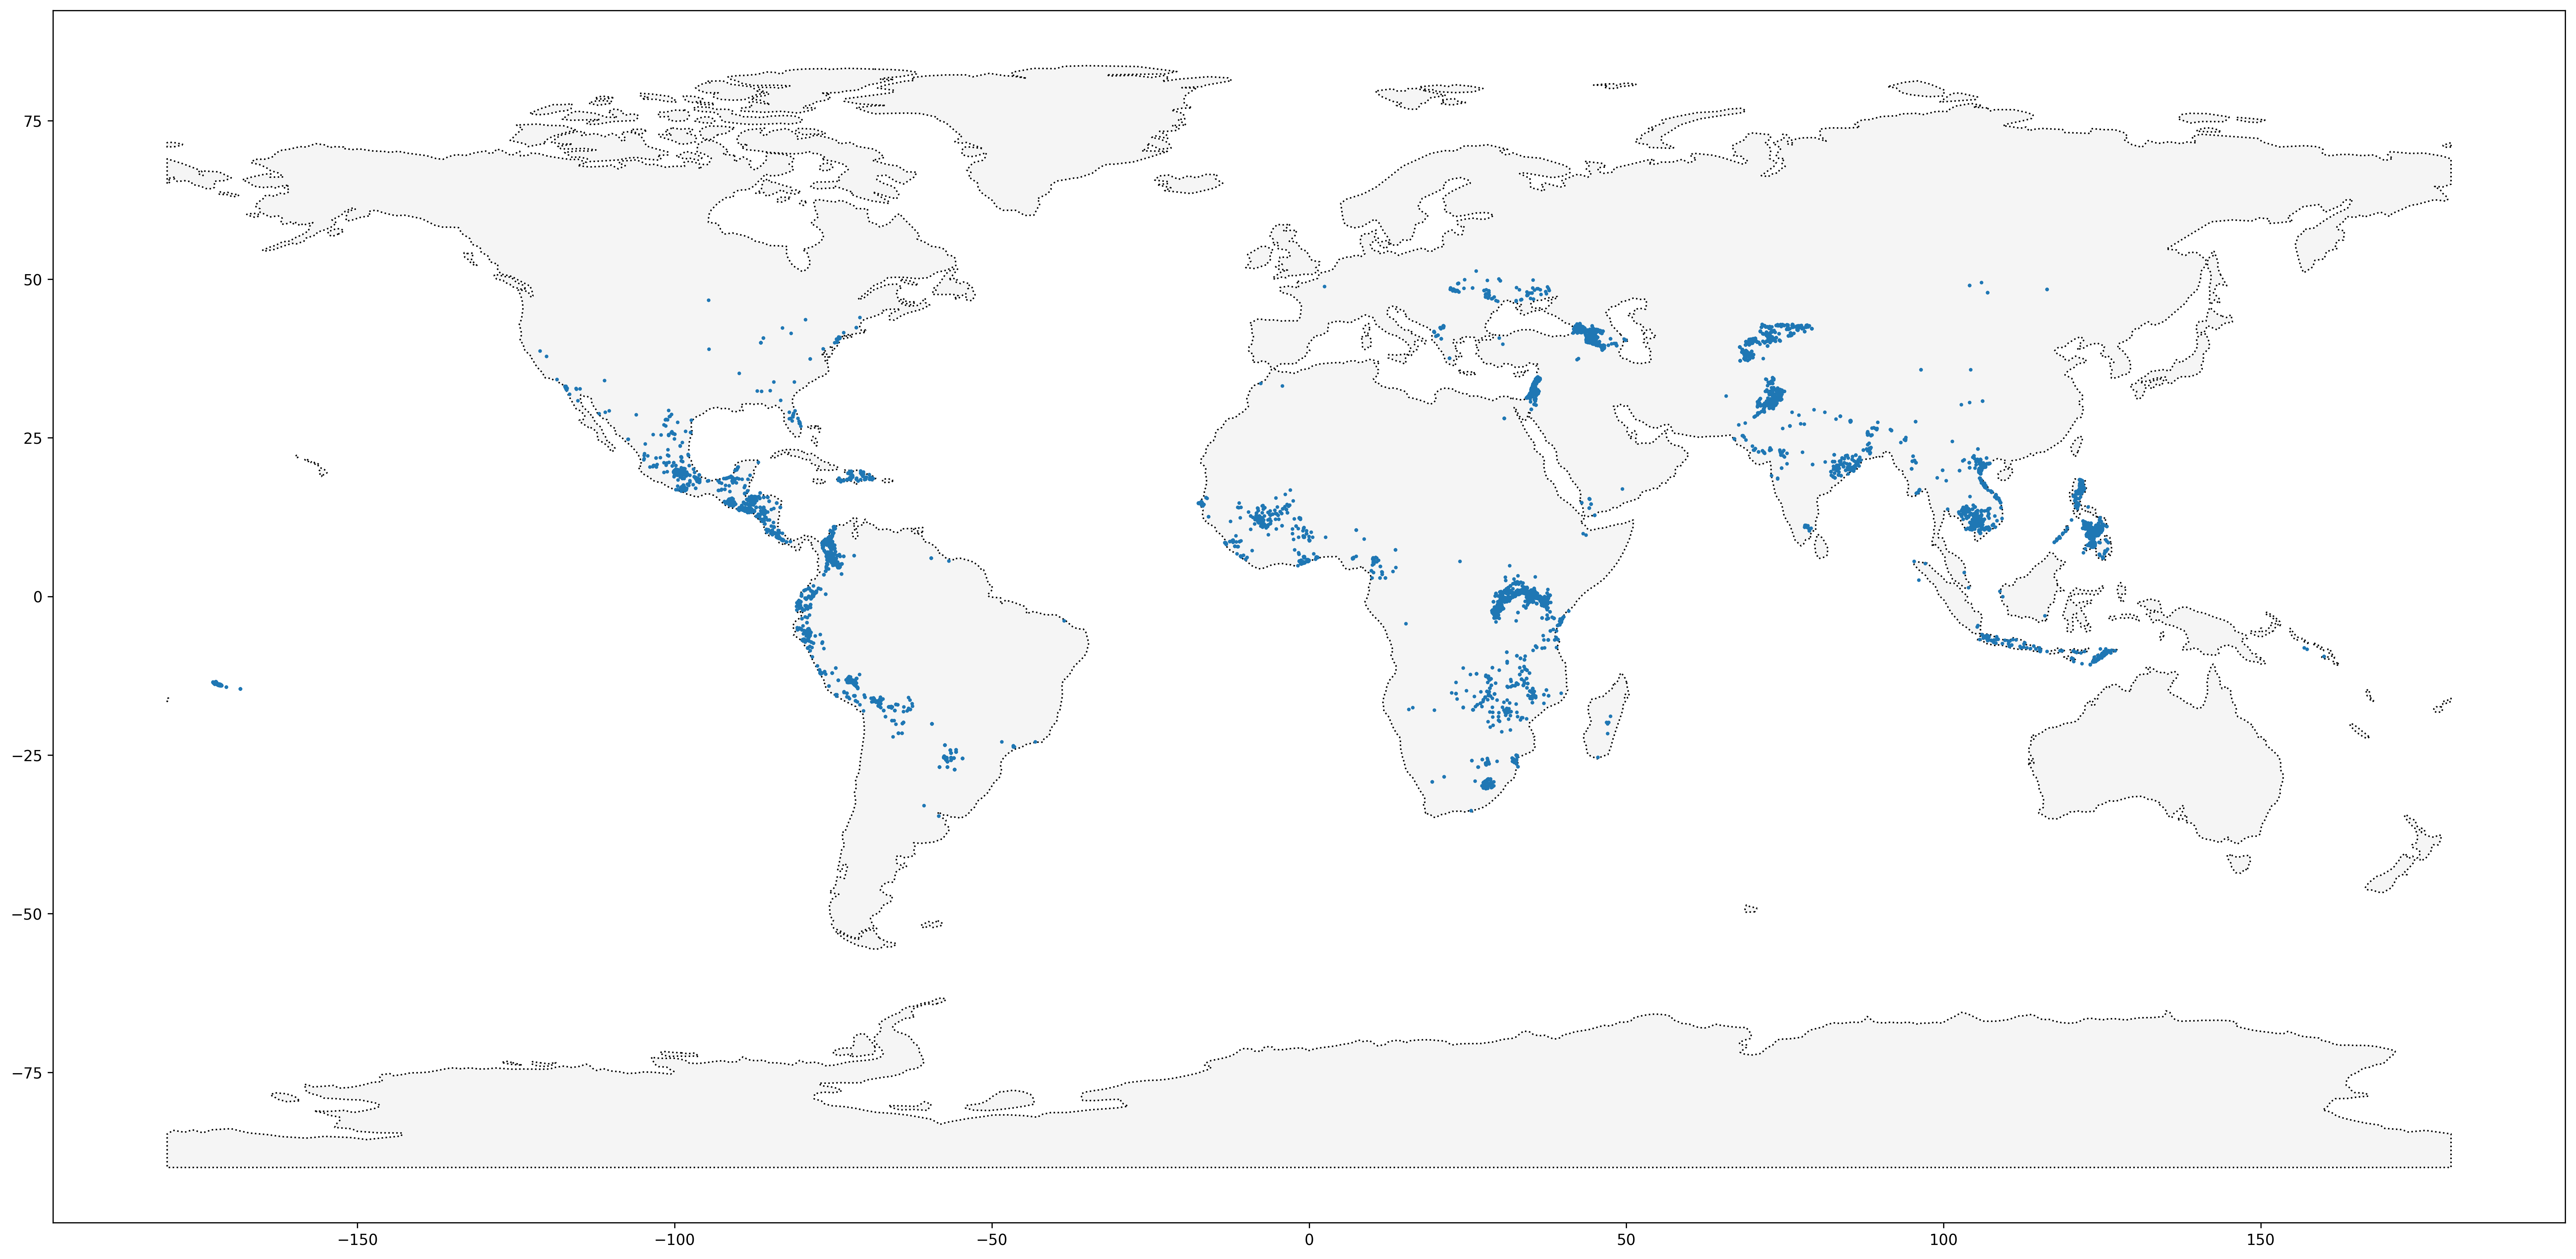

In [15]:
fig, ax = plt.subplots(figsize=(30,30), dpi=300)
# 绘制世界地图
world.plot(ax=ax, color='whitesmoke', linestyle=':', edgecolor='black')
# 在世界地图上绘制  Kiva 贷款位置
world_loans.plot(ax=ax, markersize=2)   # markersize 控制标记的大小

## Philippines 贷款

In [16]:
world_loans['country'].value_counts()

country
Philippines      3083
Armenia           942
Colombia          822
Mexico            615
Kenya             568
                 ... 
Cote D'Ivoire       1
Benin               1
South Sudan         1
Bhutan              1
Canada              1
Name: count, Length: 79, dtype: int64

In [17]:
# 获取菲律宾贷款数据
PHL_loans = world_loans[world_loans['country']=='Philippines'].copy()


In [22]:
# 菲律宾地图

# 启用 KML 驱动程序
fiona.supported_drivers['KML'] = 'rw'

# 读取 KML 文件
PHL = gpd.read_file("archive/Philippines_AL258.kml", driver='KML')  #指定使用 KML 驱动程序读取文件
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.4669 4.58718, 119.46653 4...."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.244, 126.45407 8.2..."


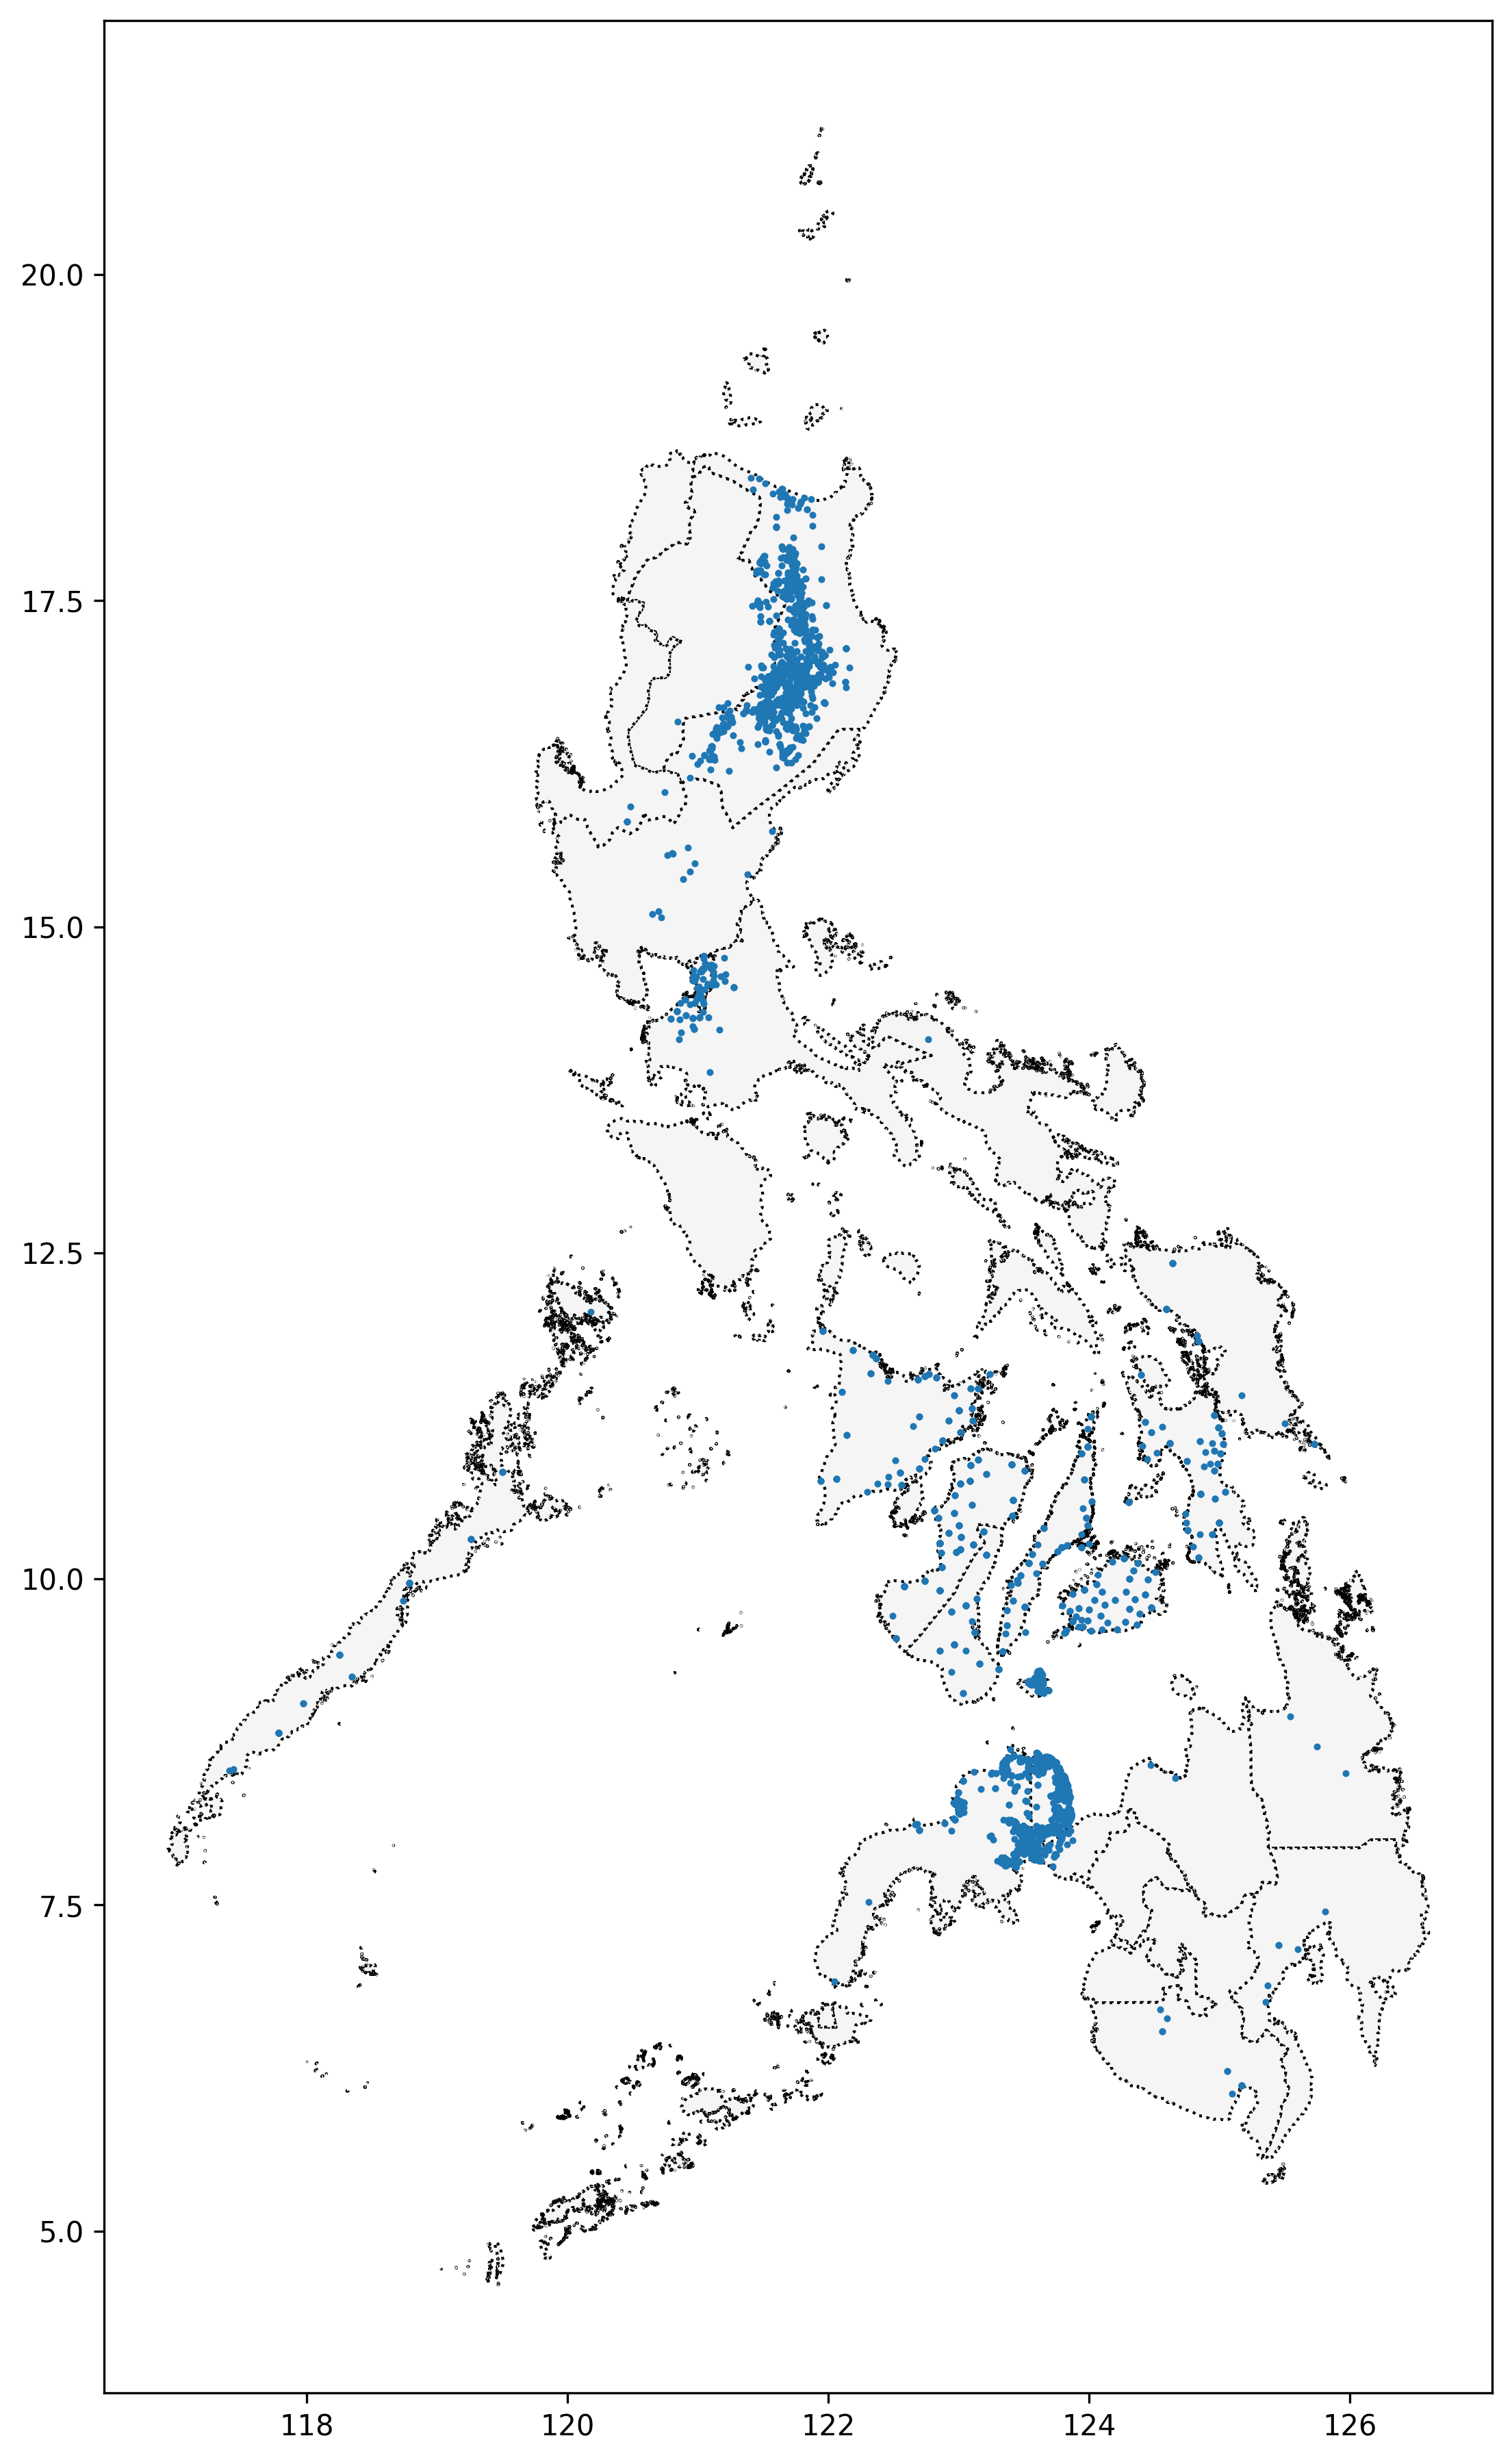

In [24]:
fig, ax = plt.subplots(figsize=(20,15), dpi=300)

PHL.plot(ax=ax, color='whitesmoke', linestyle=':', edgecolor='black')
PHL_loans.plot(ax=ax, markersize=2)

plt.show()